In [1]:
%matplotlib inline

import yt
import numpy as np
import matplotlib.pyplot as plt
import cgs as cgs

using cgs py


In [38]:
LT_sims = np.genfromtxt('leo_T_simulations.txt', names=True)
jana_sims = np.genfromtxt('jana_simulations.txt', names=True)

P_RPS = (LT_sims['vmax']*1.0E5)**2 * LT_sims['n_halo'] * cgs.mp * 0.6
P_RPS_jana = (jana_sims['vmax']*1.0E5)**2 * jana_sims['n_halo'] * cgs.mp * 0.6

r_o = 300.0*cgs.pc
M_o = 4.82812180E41 # g
M_o = 3.3E6*cgs.Msun
M_HI = 2.8E5 * cgs.Msun

In [41]:
n_o_anal = np.linspace(0.0,2.0,100)

P_anal   = cgs.G * n_o_anal * M_o / (3.0*r_o) * 1.31 * cgs.mp


n_edge = LT_sims['n_halo'] * 0.6 * LT_sims['T_halo'] / LT_sims['T_dwarf'] / 1.31
P_edge   = cgs.G * n_edge * M_o / (3.0*r_o) * 1.31 * cgs.mp

n_avg  = M_HI / (4./3. * np.pi * r_o**3) /(cgs.mp * 1.31) * np.ones(np.size(LT_sims['n_halo']))


[  6.00000000e-05   6.00000000e-05   6.00000000e-05   6.00000000e-05]
0.0 6.91322197658e-13 2.258037e-14


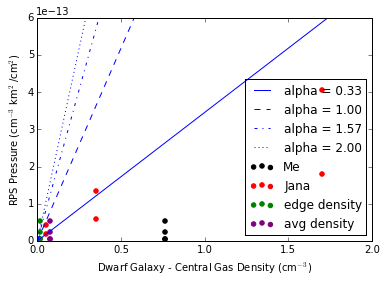

In [43]:
print LT_sims['n_halo']
plt.scatter(LT_sims['n_o'], P_RPS, color='black', label='Me')
plt.scatter(jana_sims['n_o'], P_RPS_jana, color='red', label='Jana')

i = 0
ls = ['-','--','-.',':']
for alpha in np.array([1./3.,1.0,np.pi/2.,2.0]):
    plt.plot(n_o_anal, P_anal * 3.0 * alpha, color='blue', ls=ls[i],label='alpha = %.2f'%(alpha))
    i = i + 1
plt.xlim(0.0,2.0)
#plt.semilogy()
plt.scatter(n_edge,P_RPS,color='green', label='edge density')
plt.scatter(n_avg,P_RPS,color='purple', label='avg density')
plt.xlabel(r'Dwarf Galaxy - Central Gas Density (cm$^{-3}$)')
plt.ylabel(r'RPS Pressure (cm$^{-3}$ km$^2$/cm$^{2}$)')
plt.ylim(0.0,0.6E-12)
plt.legend(loc='best')
print np.min(P_anal),np.max(P_anal), np.average(P_RPS)